In [1]:
import importlib
import utils
import visualization

importlib.reload(utils)
importlib.reload(visualization)
%reload_ext autoreload
%autoreload 2
from excel_utils import *
from utils import *
from visualization import visualize, graficar_distribucion_productos

pd.set_option('display.max_colwidth', None)


In [2]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"
# all data
df_all = load_all_sheets(excel_path)

print("Number os samples in the dataset:", df_all.shape[0])

Number os samples in the dataset: 2381


In [3]:
total_count_products = (
    df_all.groupby('Sheet')
    .size()
    .reset_index(name='Product Count')
)
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


In [4]:
# Duplicados - los productos con los mismos SKU y Nombres SKU dentro de una subempresa

In [5]:
duplicates = find_internal_duplicates(df_all)
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 58


In [6]:
duplicates.head(5)
# all duplicates are from Prilogic Arbol_24_25 company that is not considered


,Marca,Nombre SKU,SKU,Sheet
0,GALLETA COSTA TUAREG 120 GR.,GALLETA COSTA TUAREG 120 GR.,10243,Prilogic Arbol_24_25
1,GALLETA COSTA TUAREG 120 GR.,GALLETA COSTA TUAREG 120 GR.,10243,Prilogic Arbol_24_25
2,ACEITE COCINA 1 LT. MARAVILLA CHEF.,ACEITE COCINA 1 LT. MARAVILLA CHEF.,12599,Prilogic Arbol_24_25
3,ACEITE COCINA 1 LT. MARAVILLA CHEF.,ACEITE COCINA 1 LT. MARAVILLA CHEF.,12599,Prilogic Arbol_24_25
4,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,GALLETA ARCOR BOCADITOS 300 GR DULCE/MEMBR HOLANDA,14266,Prilogic Arbol_24_25


In [7]:
import pandas as pd
from fuzzywuzzy import fuzz

# Exclude 'Prilogic Arbol_24_25' completely
df_filtered = duplicates[duplicates["Sheet"] != "Prilogic Arbol_24_25"]
print(df_filtered.shape)



(0, 4)


In [8]:
# The unique number of duplicates
unique_duplicates = duplicates.groupby(["Nombre SKU", "Marca", "SKU"]).count()
print(f"Number of duplicated products: {unique_duplicates.shape[0]}")

Number of duplicated products: 29


In [9]:
unique_duplicates.head()

,,,Sheet
Nombre SKU,Marca,SKU,
ACEITE COCINA 1 LT. MARAVILLA CHEF.,ACEITE COCINA 1 LT. MARAVILLA CHEF.,12599,2
AGUA MINERAL 500 CC BENEDICTINO S/GAS,AGUA MINERAL 500 CC BENEDICTINO S/GAS,16817,2
AGUA MINERAL 500 CC CACHANTUN C/GAS,AGUA MINERAL 500 CC CACHANTUN C/GAS,82036,2
AGUA MINERAL 600 CC VITAL S/GAS,AGUA MINERAL 600 CC VITAL S/GAS,82041,2
AZUCAR 1 KL. IANSA BOLSA GRADO 1,AZUCAR 1 KL. IANSA BOLSA GRADO 1,99839,2


In [10]:
# There are no duplicates with exact same Nombre SKU in other companies besides Prilogic Arbol_24_25
unique_sheets = duplicates['Sheet'].unique()
unique_sheets = [sheet for sheet in unique_sheets if sheet != "Prilogic Arbol_24_25"]

duplicates_counts = {}

for sheet in unique_sheets:
    sub_df = duplicates[duplicates['Sheet'] == sheet]
    duplicates_counts[sheet] = sub_df.shape[0]

print(duplicates_counts)

{}


In [11]:
# for futher analisis we do not consider duplicates
df_all = df_all.drop_duplicates(["Marca", "Nombre SKU", "SKU", "Sheet"])

### Busqueda de los productos iguales que tienen SKU iguales en las diferentes subempresas

In [12]:
data = load_all_sheets(excel_path)

correct_products = find_similar_products(data, 88, different_sku=False)
correct_products = correct_products.copy()
correct_products = remove_flavor_variants(correct_products)
columns_to_show = [col for col in correct_products.columns if col not in ['Numbers 1', 'Numbers 2']]
correct_products = correct_products.loc[:, columns_to_show]
exact_matches = correct_products[correct_products['Similarity'] == 100]
partial_matches = correct_products[correct_products['Similarity'] < 100]

In [13]:
# Los productos que tienen nombres iguales y SKU iguales
same_name_same_sku = exact_matches.shape[0]
print(same_name_same_sku)

264


In [14]:
exact_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
0,CASTANO,PAN DE PASCUA 500 GR CLASICO CASTANO,21720,Surtiventas Arbol_24_25,PAN DE PASCUA 500 GR CLASICO CASTANO,21720,Prisur Arbol_24_25,100
1,LUCHETTI,SEMOLA 250 GR. LUCCHETTI,74627,Surtiventas Arbol_24_25,SEMOLA 250 GR. LUCCHETTI,74627,Prisur Arbol_24_25,100
2,LOS CHINOS,ARROZ 1 KG. GRADO 2 LOS CHINOS,78183,Prinorte Arbol_24_25,ARROZ 1 KG. GRADO 2 LOS CHINOS,78183,Prisur Arbol_24_25,100
3,VITELLI,SOPA INST. 65 GR SABOR POLLO VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR POLLO VITELLI,72472,Prisur Arbol_24_25,100
4,VITELLI,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Prisur Arbol_24_25,100


In [15]:
# Los productos que tienen nombres parecidos pero no iguales, SKU son iguales
similar_name_same_sku = partial_matches.shape[0]
print(similar_name_same_sku)

216


In [16]:
partial_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
264,GOURMET,ESCENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Surtiventas Arbol_24_25,ESENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Prisur Arbol_24_25,99
265,GOURMET,CONDIMENTO CANELA ENTERA 15 GR X 50 UN GOURMET,41022,Surtiventas Arbol_24_25,CONDIMENTO CANELA ENTERA 15 GR X 50 UND GOURMET,41022,Prisur Arbol_24_25,99
266,VIVO,JUGO NATURAL 190 ML VIVO PI¥A DP/3 UND,44103,PRISA Arbol_24_25,JUGO NATURAL 190 ML VIVO PINA DP/3 UND,44103,Prinorte Arbol_24_25,99
267,LIV,AGUA MINERAL LIV 500 ML S/GAS X 12 UN,43738,Surtiventas Arbol_24_25,AGUA MINERAL LIV 500 ML S/GAS X 12 UND,43738,Prisur Arbol_24_25,99
268,SVELTY,LECHE EN POLVO 800 GR. SVELTY DESCRE. SOFTPACK,88276,PRISA Arbol_24_25,LECHE EN POLVO 800 GR SVELTY DESCR. SOFTPACK,88276,Prinorte Arbol_24_25,99


In [17]:
exact_matches_counts = count_unique_products_per_sheet(exact_matches)

In [18]:
partial_matches_counts = count_unique_products_per_sheet(partial_matches)

### Busqueda de los productos iguales que tienen diferentes SKU

In [19]:
#Busqueda de los productos iguales que tienen diferentes SKU

In [20]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

confident, needs_review = process_excel_for_duplicates(
    excel_path,
    confidence_threshold=93,
    low_confidence_threshold=77
)


In [21]:
different_sku_conf = confident.shape[0]
different_sku_conf

58

In [22]:
different_sku_review = needs_review.shape[0]
different_sku_review

232

In [23]:
confident.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,DEYCO,ATUN LOMITOS AGUA 160 GR DEYCO,72260,Surtiventas Arbol_24_25,ATUN LOMITOS AGUA 160 GR DEYCO,98372,Prinorte Arbol_24_25,100,[160.0],[160.0]
1,COLISEO,POROTO 1 KG. HALLADO COLISEO,75760,Surtiventas Arbol_24_25,POROTO 1 KG. COLISEO HALLADO,85096,Prisur Arbol_24_25,100,[1.0],[1.0]
2,BELMONT,ACEITE COCINA 250 CC. VEGETAL BELMONT,79094,Surtiventas Arbol_24_25,ACEITE COCINA 250 CC. VEGETAL BELMONT,19256,Prisur Arbol_24_25,100,[250.0],[250.0]
3,COLISEO,AZUCAR 1 KG. COLISEO,22960,Prinorte Arbol_24_25,AZUCAR 1 KG. COLISEO,71978,Prisur Arbol_24_25,100,[1.0],[1.0]
4,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]


In [24]:
needs_review.head(5)
# Aparecen poductos que ya pueden ser diferentes como
#CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS	 -  CEREAL BARRA COSTA FRUTOS ROJOS (No tiene Yogurt)
# SALSA DE SOYA SUAVE 165 CC GOURMET -  SALSA DE SOYA SUAVE 165 CC GOURMET (tiene Sauve)
#	YERBA MATE 250 GR. SUPREMO ARGENTIN -	YERBA MATE 250 GR SUPREMO ARGENTINA NARANJA
# CAFE INST. JUAN VALDEZ 95 GR LIOFILIZADO DESCAFEIN	-  CAFE 95 GR JUAN VALDEZ INST. LIOFILIZADO
# Pero la mayoria son iguales

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,COLISEO,FIDEO 400 GR SPAGUETTI COLISEO SPECIALE,54052,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR COLISEO SPAGUETTI SPECIAL,72501,Prisur Arbol_24_25,92,[400.0],[400.0]
1,WASIL,ARVEJA 340 CC. WASIL TETRA,57039,Surtiventas Arbol_24_25,ARVEJA 340 GR. WASIL TETRA,57031,Prisur Arbol_24_25,92,[340.0],[340.0]
2,LUCCHETTI,FIDEO 400 GR TALLARIN 77 LUCCHETTI,24295,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR LUCCHETTI TALLARIN 77,75555,Prisur Arbol_24_25,92,"[400.0, 77.0]","[400.0, 77.0]"
3,NESCAFE,CAFE INST. NESCAFE TRADICION 400 GR POLVO TARRO,12596,PRISA Arbol_24_25,CAFE 400 GR NESCAFE TRADICIONAL POLVO TARRO,89295,Prisur Arbol_24_25,92,[400.0],[400.0]
4,ALOE WIN,BEBIDA ALOE WIN 500 CC ALOE VERA MANGO,12566,PRISA Arbol_24_25,BEBIDA ALOE VERA 500 ML MANGO ALOE WIN,35160,Surtiventas Arbol_24_25,92,[500.0],[500.0]


In [25]:
filtered = find_normal_cases(excel_path)
filtered = filtered.rename(columns={"Sheet": "Subempresa"})
filtered = filtered.drop_duplicates()
filtered_count = filtered.shape[0]


(2381, 4)
(2284, 4)


In [26]:
filtered_count

1376

In [27]:
exact_prod = pairs_to_unique_products(exact_matches)
partial_prod = pairs_to_unique_products(partial_matches)
condident_prod = pairs_to_unique_products(confident)
need_review_prod = pairs_to_unique_products(needs_review)

In [28]:
all_different_sku = pd.concat([condident_prod, need_review_prod])
all_different_sku = all_different_sku.drop_duplicates(["Nombre SKU", "Marca", "SKU"])
all_different_sku.shape



(288, 4)

In [29]:
all_different_sku

,Marca,Nombre SKU,SKU,Sheet
0,DEYCO,ATUN LOMITOS AGUA 160 GR DEYCO,72260,Surtiventas Arbol_24_25
1,COLISEO,POROTO 1 KG. HALLADO COLISEO,75760,Surtiventas Arbol_24_25
2,BELMONT,ACEITE COCINA 250 CC. VEGETAL BELMONT,79094,Surtiventas Arbol_24_25
3,COLISEO,AZUCAR 1 KG. COLISEO,22960,Prinorte Arbol_24_25
4,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25
...,...,...,...,...
230,VERDEFLOR,YERBA MATE 500 GR VERDEFLOR CHAU ACIDEZ MEN/POL/CE,82618,Prisur Arbol_24_25
231,COCA-COLA,BEBIDA LATA 350CC COCA-COLA ORIGINAL,82046,Prisur Arbol_24_25
232,HAITI,CAFE 250 GR HAITI MEZCLA EXPRESS ROJO MOLIDO,84522,Prisur Arbol_24_25
233,IANSA,ENDULZANTE IANSA C.K 250 ML STEVIA,92473,Surtiventas Arbol_24_25


In [30]:

confident_counts = count_unique_products_per_sheet(confident)

In [31]:
needs_review_counts = count_unique_products_per_sheet(needs_review)

In [32]:
# En las estadísticas se muestra el número de productos únicos. (no coincidencias)

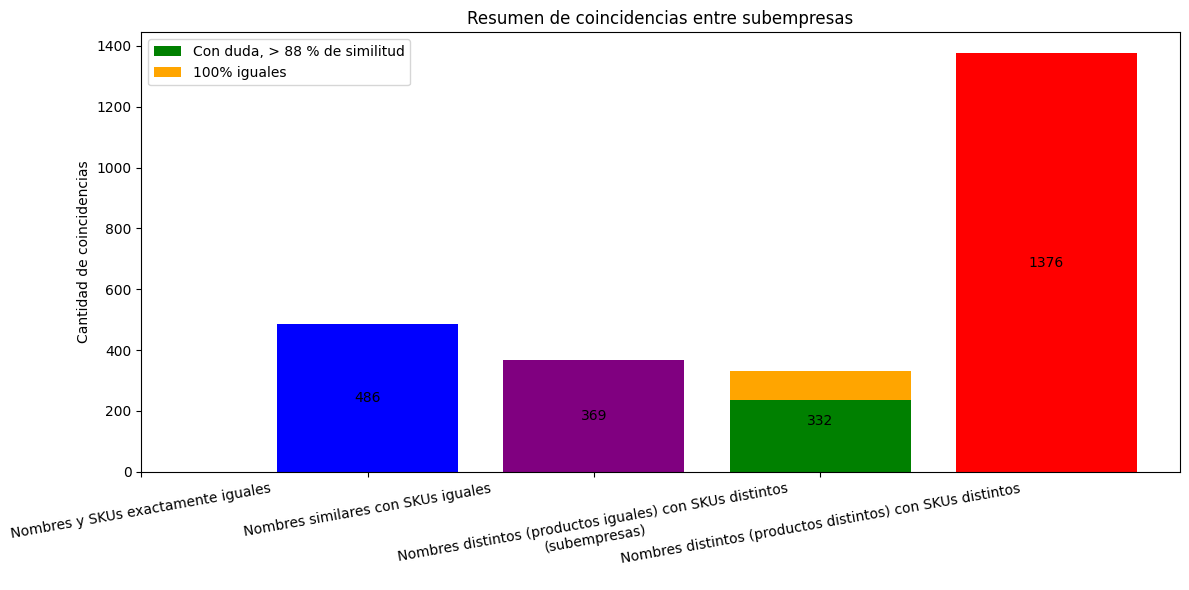

In [33]:
visualize( need_review_prod.shape[0], condident_prod.shape[0], exact_prod.shape[0],
          partial_prod.shape[0], filtered_count)


In [34]:
# Calculamos cuántos productos se repiten en 2, 3 o 4 empresas.
output_needs_review = count_unique_subempresas_per_product(needs_review)
output_confident = count_unique_subempresas_per_product(confident)
output_exact = count_unique_subempresas_per_product(exact_matches)
output_partial = count_unique_subempresas_per_product(partial_matches)
needs_review_stats = count_product_distribution_dict_only(output_needs_review)
confident_stats = count_product_distribution_dict_only(output_confident)
exact_matches_stats = count_product_distribution_dict_only(output_exact)
partial_matches_stats = count_product_distribution_dict_only(output_partial)


In [35]:
df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_needs_review.items()])
path = "/home/viktoria/Downloads/prisa/needs_review_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_confident.items()])
path = "/home/viktoria/Downloads/prisa/confident_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_exact.items()])
path = "/home/viktoria/Downloads/prisa/exact_count.xlsx"
df.to_excel(path, index=False)

df = pd.DataFrame([{'Product': name, 'Number of companies where the product is present': count} for (name, _), count in
                   output_partial.items()])
path = "/home/viktoria/Downloads/prisa/partial_count.xlsx"
df.to_excel(path, index=False)


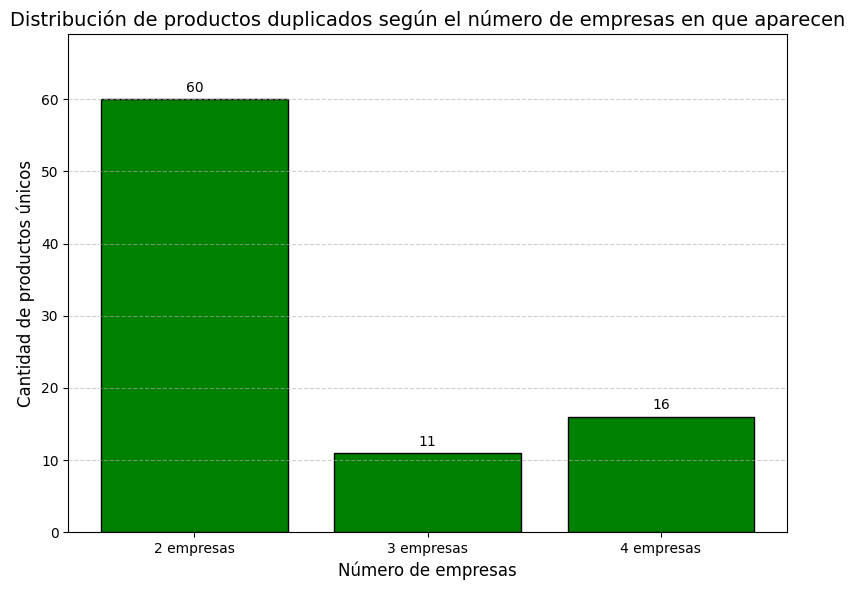

In [36]:
# Nombres distintos (productos iguales) con SKUs distintos (los casos que necesitan la revisión)
# Si por ejemplo hay producto que tiene 2 parecidos por nombres en 2 otras esmpresas todos sus 3 variaciones se cuentan como solo uno producto

graficar_distribucion_productos(needs_review_stats, "green")

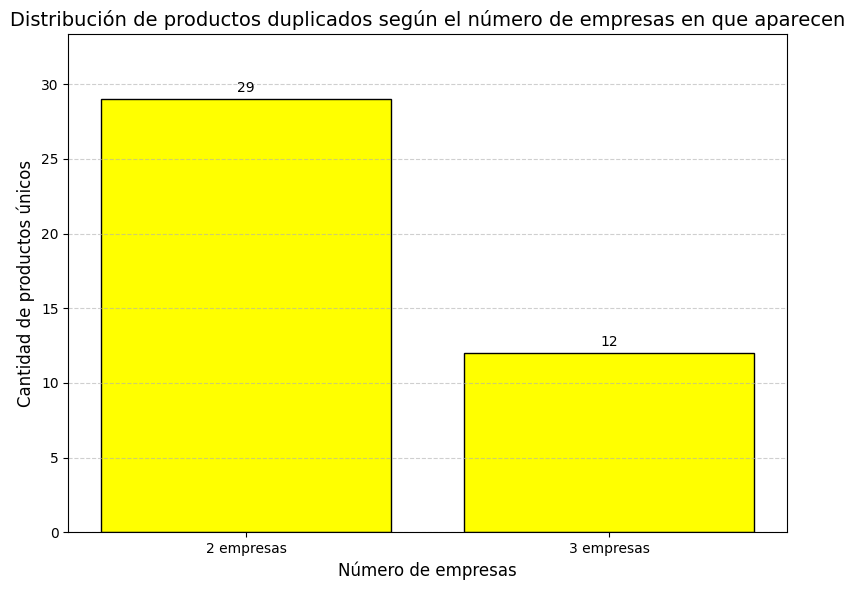

In [37]:
#Nombres distintos (productos iguales) con SKUs distintos (los casos seguros)
graficar_distribucion_productos(confident_stats, "yellow")


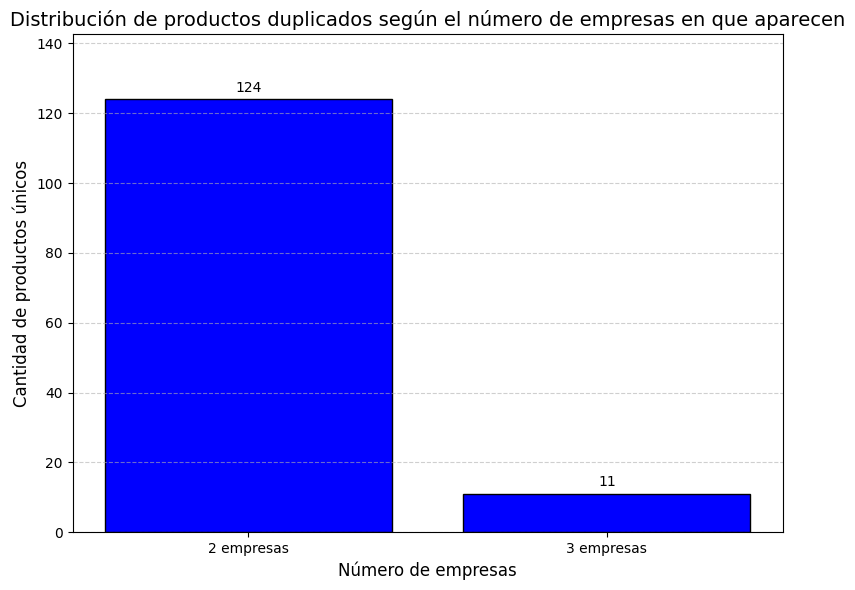

In [38]:
# Nombres y SKUs exactamente iguales
graficar_distribucion_productos(exact_matches_stats, "blue")

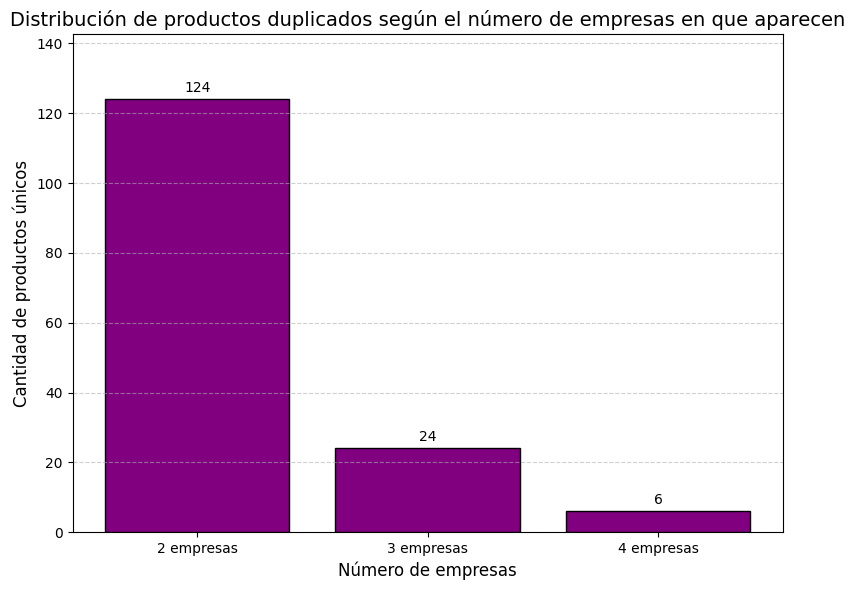

In [39]:
# Nombres similares con SKUs iguales
graficar_distribucion_productos(partial_matches_stats, "purple")

In [40]:
unique_sheets = all_different_sku['Sheet'].unique()
unique_sheets = [sheet for sheet in unique_sheets if sheet != "Prilogic Arbol_24_25"]

all_different_sku_count = {}

for sheet in unique_sheets:
    sub_df = all_different_sku[all_different_sku['Sheet'] == sheet]
    all_different_sku_count[sheet] = sub_df.shape[0]

In [41]:
unique_sheets = filtered['Subempresa'].unique()
unique_sheets = [sheet for sheet in unique_sheets if sheet != "Prilogic Arbol_24_25"]

filtered_counts = {}

for sheet in unique_sheets:
    sub_df = filtered[filtered['Subempresa'] == sheet]
    filtered_counts[sheet] = sub_df.shape[0]


In [42]:
filtered_counts

{'PRISA Arbol_24_25': 452,
 'Surtiventas Arbol_24_25': 392,
 'Prinorte Arbol_24_25': 72,
 'Prisur Arbol_24_25': 224}

In [43]:
all_different_sku_count

{'Surtiventas Arbol_24_25': 94,
 'Prinorte Arbol_24_25': 30,
 'PRISA Arbol_24_25': 58,
 'Prisur Arbol_24_25': 106}

In [44]:
duplicates_counts

{}

In [45]:
exact_matches_counts

{'PRISA Arbol_24_25': 41,
 'Prinorte Arbol_24_25': 79,
 'Prisur Arbol_24_25': 198,
 'Surtiventas Arbol_24_25': 168}

In [46]:
partial_matches_counts

{'PRISA Arbol_24_25': 53,
 'Prinorte Arbol_24_25': 44,
 'Prisur Arbol_24_25': 134,
 'Surtiventas Arbol_24_25': 138}

In [47]:
dictionaries = [exact_matches_counts, partial_matches_counts, duplicates_counts, all_different_sku_count,
                filtered_counts]
results = dict()
for dct in dictionaries:
    for key in dct.keys():
        if not key in results.keys():
            results[key] = dct[key]
        else:
            results[key] += dct[key]


In [48]:
results

{'PRISA Arbol_24_25': 604,
 'Prinorte Arbol_24_25': 225,
 'Prisur Arbol_24_25': 662,
 'Surtiventas Arbol_24_25': 792}

In [49]:
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


In [50]:

dictionaries = [
    duplicates_counts,
    exact_matches_counts,
    partial_matches_counts,
    all_different_sku_count,
    filtered_counts,
    results
]

column_names = [
    "Duplicates",
    "Same SKU, same name",
    "Same SKU, similar name",
    "Same product, different SKU",
    "Unique Products",
    "Total"
]

df = pd.DataFrame(dictionaries, index=column_names).T.fillna(0).astype(int)
df.index.name = "Company"

df
# explicaciones para cada categoria
# Need review + Confident

,Duplicates,"Same SKU, same name","Same SKU, similar name","Same product, different SKU",Unique Products,Total
Company,,,,,,
PRISA Arbol_24_25,0,41,53,58,452,604
Prinorte Arbol_24_25,0,79,44,30,72,225
Prisur Arbol_24_25,0,198,134,106,224,662
Surtiventas Arbol_24_25,0,168,138,94,392,792


In [51]:
total_count_products

,Sheet,Product Count
0,PRISA Arbol_24_25,587
1,Prilogic Arbol_24_25,265
2,Prinorte Arbol_24_25,183
3,Prisur Arbol_24_25,602
4,Surtiventas Arbol_24_25,744


In [52]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from openpyxl.utils import get_column_letter

df_reset = df.reset_index()

excel_path = "Products for each company.xlsx"
df_reset.to_excel(excel_path, index=False)


column_colors = {
    "Company": "D3D3D3",                # Light Gray
    "Total": "D3D3D3",                  # Light Gray
    "Duplicates": "A52A2A",            # Brown
    "Same SKU, same name": "87CEEB",   # Blue
    "Same SKU, similar name": "9370DB",# Purple
    "Same product, different SKU": "90EE90", # Green
    "Unique Products": "FF7F7F"        # Red
}

column_widths = {
    "Company": 30,
    "Duplicates": 15,
    "Same SKU, same name": 22,
    "Same SKU, similar name": 25,
    "Same product, different SKU": 28,
    "Unique Products": 18,
    "Total": 10
}

wb = load_workbook(excel_path)
ws = wb.active

header = [cell.value for cell in ws[1]]

for col_idx, col_name in enumerate(header, start=1):

    color = column_colors.get(col_name)
    if color:
        fill = PatternFill(start_color=color, end_color=color, fill_type="solid")
        for row in range(2, ws.max_row + 1):
            ws.cell(row=row, column=col_idx).fill = fill

    width = column_widths.get(col_name, 15)
    ws.column_dimensions[get_column_letter(col_idx)].width = width

from openpyxl.styles import Font
for cell in ws[1]:
    cell.font = Font(bold=True)
ws.freeze_panes = "B2"
wb.save(excel_path)


In [53]:
needs_review.loc[needs_review["SKU 1"] == 11484]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
25,LIPTON,TE DP X 100 BOL LIPTON YELLOW LABEL,11484,Surtiventas Arbol_24_25,TE LIPTON YELLOW LABEL X 100 BOLSITAS,71075,Prisur Arbol_24_25,89,[100.0],[100.0]


In [54]:
confident.loc[confident["SKU 1"] == 11484]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
47,LIPTON,TE DP X 100 BOL LIPTON YELLOW LABEL,11484,Surtiventas Arbol_24_25,TE LIPTON YELLOW LABEL X 100 BL,71075,Prinorte Arbol_24_25,94,[100.0],[100.0]


In [55]:
needs_review.loc[needs_review["SKU 1"] == 41058]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
20,GOURMET,SALSA DE SOYA 165 CC GOURMET,41058,Surtiventas Arbol_24_25,SALSA DE SOYA SUAVE 165 CC GOURMET,92370,Prisur Arbol_24_25,90,[165.0],[165.0]


In [56]:
exact_matches.loc[exact_matches["SKU 1"] == 41058]

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
213,GOURMET,SALSA DE SOYA 165 CC GOURMET,41058,Surtiventas Arbol_24_25,SALSA DE SOYA 165 CC GOURMET,41058,Prisur Arbol_24_25,100


In [57]:
# The check if there are any duplicates with very similar names in companies other than Prilogic

import pandas as pd
from fuzzywuzzy import fuzz

def find_internal_duplicates(df):
    """
    Finds products from the same subempresa with the same SKU and Nombre SKU.
    """
    duplicates = (
        df.groupby(['Sheet', 'SKU',])
        .filter(lambda x: len(x) > 1)
        .sort_values(['Sheet', 'SKU'])
    )
    return duplicates.reset_index(drop=True)

duplicates = find_internal_duplicates(df_all)


df_filtered = duplicates[duplicates["Sheet"] != "Prilogic Arbol_24_25"]
print(f"Filtered rows: {df_filtered.shape}")

matches = []
threshold = 92

for sheet_name, group in df_filtered.groupby("Sheet"):
    group = group.reset_index(drop=True)

    for i in range(len(group)):
        row1 = group.iloc[i]
        name1 = row1["Nombre SKU"]
        sku1 = row1["SKU"]

        for j in range(i + 1, len(group)):
            row2 = group.iloc[j]
            name2 = row2["Nombre SKU"]
            sku2 = row2["SKU"]
            if sku1!=sku2:
                continue

            score = fuzz.ratio(name1, name2)
            if score >= threshold:
                matches.append({
                    "Sheet": sheet_name,
                    "SKU 1": sku1,
                    "Name 1": name1,
                    "SKU 2": sku2,
                    "Name 2": name2,
                    "Similarity": score
                })

similar_df = pd.DataFrame(matches)
similar_df.sort_values(by="Similarity", ascending=False).head(15)


Filtered rows: (359, 4)


,Sheet,SKU 1,Name 1,SKU 2,Name 2,Similarity
22,Prisur Arbol_24_25,75555,PASTA FIDEO 400 GR LUCCHETTI TALLARIN 77,75555,PASTA FIDEO 400 GR LUCCHETTI TALLARIN 78,98
0,PRISA Arbol_24_25,11737,BARRA PROTEINA WILD PROTEIN 45 GR CHOCOLATE,11737,BARRA PROTEINA WILD PROTEIN 45 GR CHOCOLATE COCO,95
1,PRISA Arbol_24_25,11737,BARRA PROTEINA WILD PROTEIN 45 GR CHOCOLATE,11737,BARRA PROTEINA WILD PROTEIN 45 GR CHOCOLATE MANI,95
17,Prisur Arbol_24_25,71131,COMIDA P.UNO SOPA CAMARON 65 GR TRAVERSO,71131,COMIDA P.UNO SOPA CARNE 65 GR TRAVERSO,95
18,Prisur Arbol_24_25,71132,COMIDA P.UNO SOPA CAMARON 65 GR COLISEO,71132,COMIDA P.UNO SOPA CARNE 65 GR COLISEO,95
19,Prisur Arbol_24_25,72472,SOPA INST. 65 GR SABOR CAMARON VITELLI,72472,SOPA INST. 65 GR SABOR CARNE VITELLI,95
33,Surtiventas Arbol_24_25,72472,SOPA INST. 65 GR SABOR CAMARON VITELLI,72472,SOPA INST. 65 GR SABOR CARNE VITELLI,95
31,Surtiventas Arbol_24_25,57024,FIDEO 400 GR CORBATA LUCCHETTI,57024,FIDEO 400 GR CORBATITAS LUCCHETTI,95
14,Prinorte Arbol_24_25,53013,GLOBOS N. 9 LISO X 25 UN ROJO KIKO,53013,GLOBOS N. 9 LISO X 25 UN ROSADO KIKO,94
3,PRISA Arbol_24_25,11738,BARRA PROTEINA WILD PROTEIN 30 GR MUNCHY CHOC.CHIP,11738,BARRA PROTEINA WILD PROTEIN 30 GR MUNCHY CHOC.MANI,94


In [58]:
# SO there are no duplicates with very similar name as all these 3 cases are  different

In [68]:
save_products_pairs_to_excel(exact_matches, partial_matches, confident, needs_review, filtered)

Excel file saved as '/home/viktoria/Downloads/pairs_of_products.xlsx'
